# Descenso del gradiente para minimizar funciones
---
***Tenga en cuenta que este script es una guía para ayudar en la resolución de los ejercicios. Las consignas, items y/o valores pueden no coincidir con los de la práctica.***


Utilice la técnica del descenso de gradiente para calcular el mínimo de las siguientes funciones

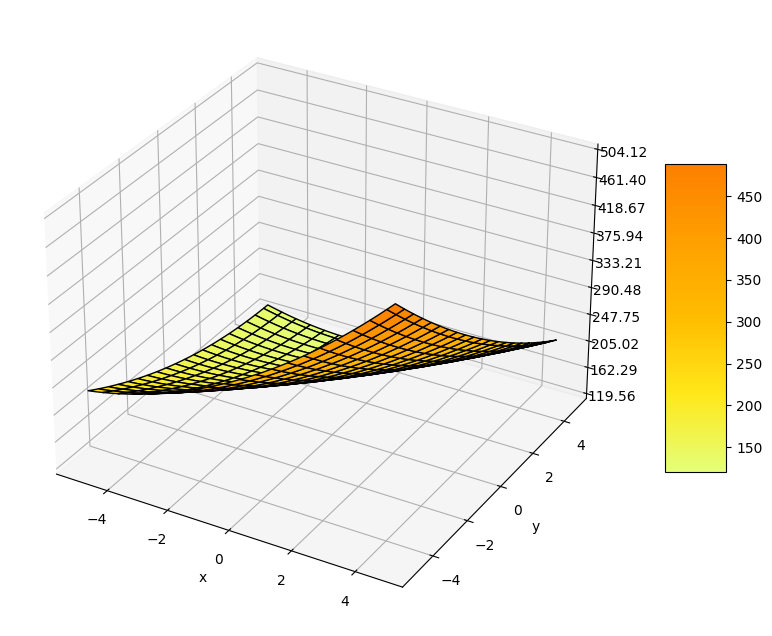

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import meshgrid
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def graficar3D(X,Y,Z):
    fig = plt.figure(figsize=(10,8))
    # ax = fig.gca(projection='3d') # error por actualizacion de matplotlib
    ax = fig.add_subplot(projection = '3d')
    surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                           edgecolors='k',
                           cmap=cm.Wistia,
                           linewidth=1, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


RNG = 5.0
h = np.arange(-RNG, RNG, RNG/20)
v = np.arange(-RNG, RNG, RNG/20)

#Se define la grilla de puntos
R, H = meshgrid(h, v)

# Define función y evalua la funcion segun los valores de R y H
def fun(r, h):
    # return math.pi * r**2 * h
    return h**2 - 2 *r * h + 2 * r**2 + 18 * r -20 * h + 201

def dr_fun(r, h): # derivada parcial respecto de r
    # return math.pi * 2 * r *h
    return -2 * h + 4 * r + 18

def dh_fun(r, h): # derivada parcial respecto de h
    # return math.pi * 2 * r * r
    return 2 * h - 2 * r - 20


Z = fun(R, H)

graficar3D(R, H, Z)

In [27]:
# Este script sirve para los puntos 2, 3 y 4 de la práctica
import math

# asignar r y h con el punto inicial
(r,h) = (78,16)

# este punto genera OverflowError: 'Numerical result out of range'
# se "cae" a -infinito
#(r,h) = (1.5, 1)

# (2,5): 100
# (-6,200): 36 
# (78,16): 46

# valor para controlar el paso del gradiente
alfa = 0.2

MAX_ITE = 100 # cantidad max de iteraciones
ite = 1

v_new = fun(r, h)   # valor inicial
v = v_new - 1 # fuerza entrada al while

try:
    # repite bucle mientras no alcance el maximo de iteraciones o la cota de error
    while ((ite < MAX_ITE) and (math.fabs(v - v_new) > 10e-5)):
        v = v_new
        # PtoAnt = [r, h, v]
        grad_x = dr_fun(r, h) # derivada respecto de r en punto actual
        grad_y = dh_fun(r, h) # derivada respecto de h en punto actual

        r = r - alfa * grad_x             # avanza en dirección al gradiente en x
        h = h - alfa * grad_y             # avanza en dirección al gradiente en y

        v_new = h**2 - 2 *r * h + 2 * r**2 + 18 * r -20 * h + 201      # calcula valor en nueva posicion

        ite = ite + 1

    print("iteraciones = %d   r= %.5f   h=%.5f   v=%.8f" % (ite,r,h,v_new))
except OverflowError as e:
    print("Oooops: después de la iteracion %d algún valor tiende a infinito:\n r = %.1e \n h = %.1e" % (ite, r,h))


iteraciones = 46   r= 1.01352   h=11.02188   v=100.00025274


In [7]:
fun(r, h)

0.32780704005329